In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
innovation = pd.read_csv('innovation_rates_by_college.csv')
innovation.rename(columns={
    'instnm':'college_name',
    'count': 'total_students',
    'count_pq1': 'lower_class',
    'count_pq2': 'lower_middle_class',
    'count_pq3': 'middle_class',
    'count_pq4': 'upper-middle_class',
    'count_pq5': 'upper_class',
    'inventor_pq1': 'lower_class_inventor',
    'inventor_pq2': 'lower-middle_class_inventor',
    'inventor_pq3': 'middle_class_inventor',
    'inventor_pq4': 'upper_middle_class_inventor',
    'inventor_pq5': 'upper_class_inventor',
    'top5cit': 'top5citedinventors'}, inplace=True)
innovation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   super_opeid                  423 non-null    int64  
 1   college_name                 423 non-null    object 
 2   total_students               423 non-null    int64  
 3   lower_class                  423 non-null    int64  
 4   lower_middle_class           423 non-null    int64  
 5   middle_class                 423 non-null    int64  
 6   upper-middle_class           423 non-null    int64  
 7   upper_class                  423 non-null    int64  
 8   inventor                     423 non-null    float64
 9   lower_class_inventor         423 non-null    float64
 10  lower-middle_class_inventor  423 non-null    float64
 11  middle_class_inventor        423 non-null    float64
 12  upper_middle_class_inventor  423 non-null    float64
 13  upper_class_inventor

In [4]:
drop = [0,4,6,10,12]
innovation = innovation.drop(innovation.columns[drop], axis=1)
innovation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   college_name           423 non-null    object 
 1   total_students         423 non-null    int64  
 2   lower_class            423 non-null    int64  
 3   middle_class           423 non-null    int64  
 4   upper_class            423 non-null    int64  
 5   inventor               423 non-null    float64
 6   lower_class_inventor   423 non-null    float64
 7   middle_class_inventor  423 non-null    float64
 8   upper_class_inventor   423 non-null    float64
 9   top5citedinventors     423 non-null    float64
 10  total_patents          423 non-null    int64  
 11  total_cites            423 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 39.8+ KB


In [5]:
baseline = pd.read_csv('baseline_cross-sec_estimates.csv')
baseline.rename(columns={
    'name':'college_name',
}, inplace=True)
baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 85 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   super_opeid           2202 non-null   int64  
 1   college_name          2202 non-null   object 
 2   type                  2199 non-null   float64
 3   tier                  2202 non-null   int64  
 4   tier_name             2202 non-null   object 
 5   iclevel               2199 non-null   float64
 6   region                2199 non-null   float64
 7   state                 2199 non-null   object 
 8   cz                    2199 non-null   float64
 9   czname                2199 non-null   object 
 10  cfips                 2199 non-null   float64
 11  county                2190 non-null   object 
 12  multi                 2199 non-null   float64
 13  count                 2202 non-null   float64
 14  female                2183 non-null   float64
 15  k_married            

In [6]:
drop = [0,2,4,5,7,8,9,10,11,12,15,20,30,43,44,45,46,47,78,79,80,81,82,83,84]
baseline = baseline.drop(baseline.columns[drop], axis=1)
baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   college_name        2202 non-null   object 
 1   tier                2202 non-null   int64  
 2   region              2199 non-null   float64
 3   count               2202 non-null   float64
 4   female              2183 non-null   float64
 5   mr_kq5_pq1          2202 non-null   float64
 6   mr_ktop1_pq1        2202 non-null   float64
 7   par_mean            2202 non-null   float64
 8   par_median          2202 non-null   int64  
 9   par_q1              2202 non-null   float64
 10  par_q2              2202 non-null   float64
 11  par_q3              2202 non-null   float64
 12  par_q4              2202 non-null   float64
 13  par_q5              2202 non-null   float64
 14  par_top10pc         2202 non-null   float64
 15  par_top5pc          2202 non-null   float64
 16  par_to

In [7]:
merged_df = pd.merge(innovation, baseline, on='college_name')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 71 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   college_name           422 non-null    object 
 1   total_students         422 non-null    int64  
 2   lower_class            422 non-null    int64  
 3   middle_class           422 non-null    int64  
 4   upper_class            422 non-null    int64  
 5   inventor               422 non-null    float64
 6   lower_class_inventor   422 non-null    float64
 7   middle_class_inventor  422 non-null    float64
 8   upper_class_inventor   422 non-null    float64
 9   top5citedinventors     422 non-null    float64
 10  total_patents          422 non-null    int64  
 11  total_cites            422 non-null    int64  
 12  tier                   422 non-null    int64  
 13  region                 422 non-null    float64
 14  count                  422 non-null    float64
 15  female

In [8]:
college = pd.read_csv('college_level_characteristics.csv')
college.rename(columns={
    'name':'college_name',
}, inplace=True)
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   super_opeid                       2463 non-null   int64  
 1   college_name                      2463 non-null   object 
 2   region                            2463 non-null   int64  
 3   state                             2463 non-null   object 
 4   fips                              2463 non-null   int64  
 5   cz                                2463 non-null   int64  
 6   czname                            2463 non-null   object 
 7   cfips                             2463 non-null   int64  
 8   county                            2449 non-null   object 
 9   zip                               2463 non-null   int64  
 10  tier                              2463 non-null   int64  
 11  tier_name                         2463 non-null   object 
 12  type  

In [9]:
drop = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,18,19,20,25,26,29,30,32]
college = college.drop(college.columns[drop], axis=1)
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   college_name                      2463 non-null   object 
 1   barrons                           2463 non-null   int64  
 2   exp_instr_pc_2000                 2381 non-null   float64
 3   exp_instr_pc_2013                 2455 non-null   float64
 4   ipeds_enrollment_2013             2463 non-null   int64  
 5   ipeds_enrollment_2000             2415 non-null   float64
 6   sticker_price_2013                2270 non-null   float64
 7   sticker_price_2000                2160 non-null   float64
 8   avgfacsal_2013                    2340 non-null   float64
 9   avgfacsal_2001                    2170 non-null   float64
 10  scorecard_netprice_2013           2451 non-null   float64
 11  scorecard_median_earnings_2011    2389 non-null   float64
 12  endowm

In [10]:
merged_df2 = pd.merge(merged_df, college, on='college_name')
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 97 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   college_name                      422 non-null    object 
 1   total_students                    422 non-null    int64  
 2   lower_class                       422 non-null    int64  
 3   middle_class                      422 non-null    int64  
 4   upper_class                       422 non-null    int64  
 5   inventor                          422 non-null    float64
 6   lower_class_inventor              422 non-null    float64
 7   middle_class_inventor             422 non-null    float64
 8   upper_class_inventor              422 non-null    float64
 9   top5citedinventors                422 non-null    float64
 10  total_patents                     422 non-null    int64  
 11  total_cites                       422 non-null    int64  
 12  tier    

In [11]:
merged_df2['tier'] = merged_df2['tier'].astype('category')
merged_df2['region'] = merged_df2['region'].astype('category')
merged_df2['barrons'] = merged_df2['barrons'].astype('category')
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 97 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   college_name                      422 non-null    object  
 1   total_students                    422 non-null    int64   
 2   lower_class                       422 non-null    int64   
 3   middle_class                      422 non-null    int64   
 4   upper_class                       422 non-null    int64   
 5   inventor                          422 non-null    float64 
 6   lower_class_inventor              422 non-null    float64 
 7   middle_class_inventor             422 non-null    float64 
 8   upper_class_inventor              422 non-null    float64 
 9   top5citedinventors                422 non-null    float64 
 10  total_patents                     422 non-null    int64   
 11  total_cites                       422 non-null    int64   

In [12]:
import pandas as pd

# Assuming df is your DataFrame
# Count of nulls
null_count = merged_df2['endowment_pc_2000'].isnull().sum()

# Count of non-nulls
non_null_count = merged_df2['endowment_pc_2000'].count()

print(f"Null count: {null_count}")
print(f"Non-null count: {non_null_count}")


Null count: 235
Non-null count: 187


In [13]:
merged_df2['endowment_pc_2000'].describe()

count      187.000000
mean      5929.649388
std      11880.279134
min          0.984410
25%        556.136870
50%       1932.436900
75%       6505.115500
max      93394.555000
Name: endowment_pc_2000, dtype: float64

In [14]:

# Assuming df is your DataFrame and 'endowment' is your column
# Create a new categorical column based on the conditions
merged_df2['endowment_pc_2000'] = merged_df2['endowment_pc_2000'].fillna(0)
merged_df2['endowment_pc_2000'] = pd.cut(merged_df2['endowment_pc_2000'],
                                  bins=[-float('inf'), 0, 556.136870, 6505.115500, float('inf')],
                                  labels=['Community College', 'Small Endowment', 'Medium Endowment', 'Large Endowment'],
                                  include_lowest=True)

merged_df2['endowment_pc_2000'].value_counts()

endowment_pc_2000
Community College    235
Medium Endowment      93
Small Endowment       47
Large Endowment       47
Name: count, dtype: int64

/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

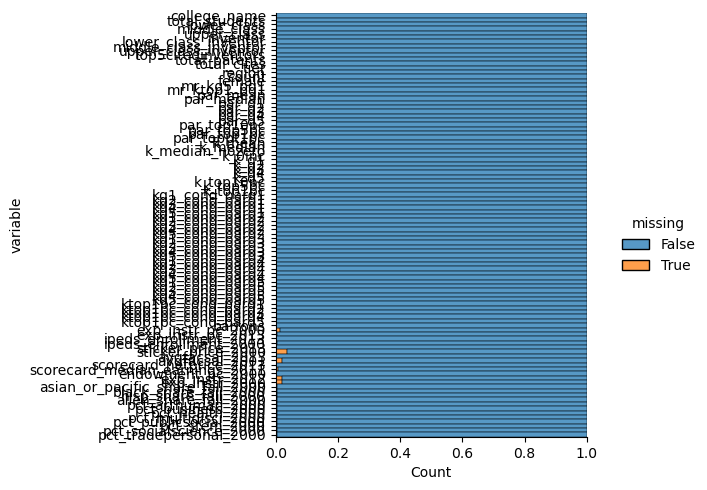

In [16]:
import seaborn as sns
sns.displot(
    data=merged_df2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [17]:
merged_df2.dropna(inplace=True)

In [19]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 421
Data columns (total 97 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   college_name                      394 non-null    object  
 1   total_students                    394 non-null    int64   
 2   lower_class                       394 non-null    int64   
 3   middle_class                      394 non-null    int64   
 4   upper_class                       394 non-null    int64   
 5   inventor                          394 non-null    float64 
 6   lower_class_inventor              394 non-null    float64 
 7   middle_class_inventor             394 non-null    float64 
 8   upper_class_inventor              394 non-null    float64 
 9   top5citedinventors                394 non-null    float64 
 10  total_patents                     394 non-null    int64   
 11  total_cites                       394 non-null    int64   
 12 

/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

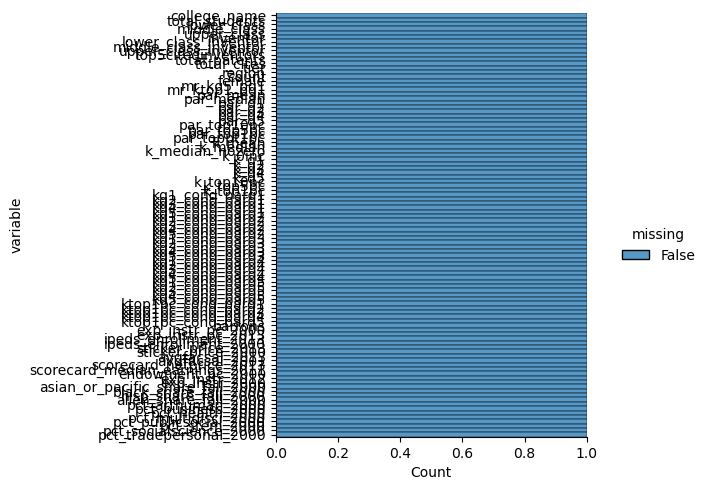

In [18]:
import seaborn as sns
sns.displot(
    data=merged_df2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [20]:
merged_df2.to_csv('post_lasso_data_cleaning.csv', index=False)